In [15]:
from google.colab import files
uploaded = files.upload()


Saving ChurnData.csv to ChurnData (1).csv


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [17]:
df = pd.read_csv("ChurnData.csv")
df.head()  # Show first 5 rows


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [18]:
X = df.iloc[:, :-1].values   # All columns except last
y = df.iloc[:, -1].values    # Last column as label


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
svm = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can also use kernel='linear'
svm.fit(X_train, y_train)


SVC()

In [22]:
y_pred = svm.predict(X_test)


In [23]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[34  5]
 [ 5  6]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87        39
         1.0       0.55      0.55      0.55        11

    accuracy                           0.80        50
   macro avg       0.71      0.71      0.71        50
weighted avg       0.80      0.80      0.80        50



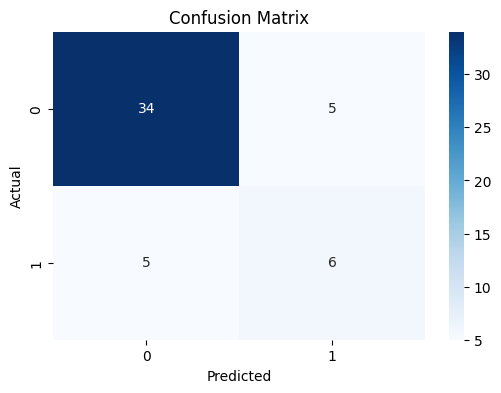

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


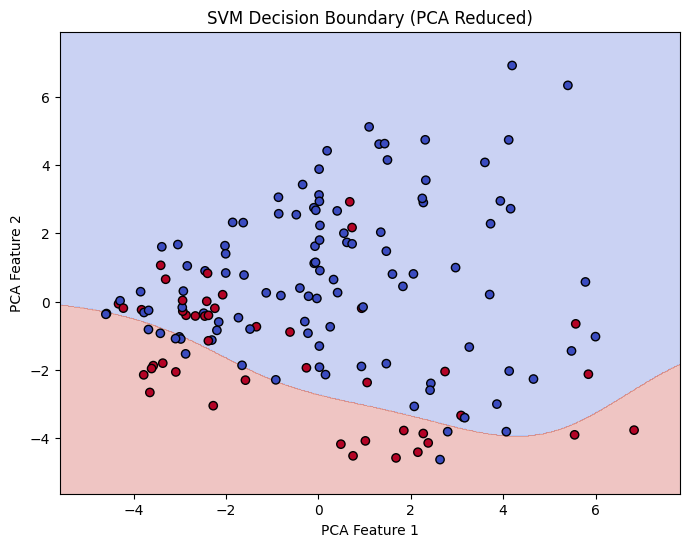

In [25]:
from sklearn.decomposition import PCA

# Reduce features to 2D for visualization
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

# Train a new SVM on reduced data
svm_2d = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_2d.fit(X_train_2D, y_train)

# Create meshgrid for plotting
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict over the mesh
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('SVM Decision Boundary (PCA Reduced)')
plt.show()
